<a href="https://colab.research.google.com/github/guillaumebdf/QM/blob/main/parts2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import random
import plotly.graph_objects as go

In [8]:
mydf = pd.read_csv("meat_CO2_v4.csv")
mydf

,country,meat_kg_pc,CO2_tonnes_pc,population
0,Afghanistan,8.59,0.3124,37171922
1,Albania,47.51,1.5757,2866376
2,Algeria,18.06,3.5346,42228415
3,Angola,23.49,0.6754,30809787
4,Antigua and Barbuda,72.04,4.3952,96282
...,...,...,...,...
164,Venezuela,40.94,2.9754,28887117
165,Vietnam,63.33,2.6126,95545959
166,Yemen,16.86,0.3275,28498683
167,Zambia,13.12,0.3575,17351714


In [3]:
df2 = pd.read_csv("food_footprints.csv")
df2.set_index("food", inplace = True)
df2

,GHG_emissions_per_kilo,proteins_per_100g_in_g
food,,
beef_herd,99.48,28.69
lamb_and_mutton,39.72,18.24
beef_dairy,33.30,28.69
prawns,26.87,16.87
pork,12.31,19.31
poultry,9.87,25.00
eggs,4.67,12.52
rice,4.45,13.35
tofu,3.16,12.95


In [4]:
df2.describe()

,GHG_emissions_per_kilo,proteins_per_100g_in_g
count,16.000000,16.000000
mean,15.287500,15.310625
std,25.675019,7.923815
min,0.430000,2.550000
25%,1.472500,11.350000
50%,3.805000,15.110000
75%,15.950000,18.687500
max,99.480000,28.690000


In [27]:
meat = [df2.loc['beef_herd']['GHG_emissions_per_kilo'], df2.loc['lamb_and_mutton']['GHG_emissions_per_kilo'], df2.loc['prawns']['GHG_emissions_per_kilo'], df2.loc['pork']['GHG_emissions_per_kilo'], df2.loc['poultry']['GHG_emissions_per_kilo']]
mean_meat = 0
for i in range(len(meat)):
  mean_meat = mean_meat + meat[i]
mean_meat = mean_meat/len(meat)
print(mean_meat)

vegan = [df2.loc['rice']['GHG_emissions_per_kilo'], df2.loc['tofu']['GHG_emissions_per_kilo'], df2.loc['oatmeal']['GHG_emissions_per_kilo'], df2.loc['wheat_and_rye']['GHG_emissions_per_kilo'], df2.loc['barley']['GHG_emissions_per_kilo'], df2.loc['peas']['GHG_emissions_per_kilo'], df2.loc['soymilk']['GHG_emissions_per_kilo'], df2.loc['nuts']['GHG_emissions_per_kilo']]
mean_vegan = 0
for i in range(len(vegan)):
  mean_vegan = mean_vegan + vegan[i]
mean_vegan = mean_vegan/len(vegan)
print(mean_vegan)

37.65
1.90375


In [6]:
meat_prot = (df2.loc['beef_herd']['proteins_per_100g_in_g']+ df2.loc['lamb_and_mutton']['proteins_per_100g_in_g']+ df2.loc['prawns']['proteins_per_100g_in_g']+ df2.loc['pork']['proteins_per_100g_in_g']+ df2.loc['poultry']['proteins_per_100g_in_g'])/len(meat)
vegan_prot = (df2.loc['rice']['proteins_per_100g_in_g']+ df2.loc['tofu']['proteins_per_100g_in_g']+ df2.loc['oatmeal']['proteins_per_100g_in_g']+ df2.loc['wheat_and_rye']['proteins_per_100g_in_g']+ df2.loc['barley']['proteins_per_100g_in_g']+ df2.loc['peas']['proteins_per_100g_in_g']+ df2.loc['soymilk']['proteins_per_100g_in_g']+ df2.loc['nuts']['proteins_per_100g_in_g'])/len(vegan)
print(meat_prot)
print(vegan_prot)


21.622
11.54125


In [7]:
diff = meat_prot/vegan_prot
diff

1.8734539153038017

In [9]:
mydf.set_index("country", inplace = True)

In [10]:
mydf

,meat_kg_pc,CO2_tonnes_pc,population
country,,,
Afghanistan,8.59,0.3124,37171922
Albania,47.51,1.5757,2866376
Algeria,18.06,3.5346,42228415
Angola,23.49,0.6754,30809787
Antigua and Barbuda,72.04,4.3952,96282
...,...,...,...
Venezuela,40.94,2.9754,28887117
Vietnam,63.33,2.6126,95545959
Yemen,16.86,0.3275,28498683


In [11]:
mean_meat_cons = 0
for i in range(len(mydf)):
  mean_meat_cons = mean_meat_cons + mydf.meat_kg_pc[i]
mean_meat_cons = mean_meat_cons/len(mydf)
print(mean_meat_cons)

mean_meat_without_china = 0
for i in range(len(mydf)):
  mean_meat_without_china = mean_meat_without_china + mydf.meat_kg_pc[i]
mean_meat_without_china = mean_meat_without_china - mydf.loc["China"]["meat_kg_pc"]
mean_meat_without_china = mean_meat_without_china/(len(mydf)-1)
print(mean_meat_without_china)

mean_meat_without_us_co = 0
for i in range(len(mydf)):
  mean_meat_without_us_co = mean_meat_without_us_co + mydf.meat_kg_pc[i]
mean_meat_without_us_co = mean_meat_without_us_co - mydf.loc["Canada"]["meat_kg_pc"]
mean_meat_without_us_co = mean_meat_without_us_co - mydf.loc["United States"]["meat_kg_pc"]
mean_meat_without_us_co = mean_meat_without_us_co - mydf.loc["Australia"]["meat_kg_pc"]
mean_meat_without_us_co = mean_meat_without_us_co/(len(mydf)-3)
print(mean_meat_without_us_co)
 

48.88337278106511
48.8136904761905
47.78897590361448


In [12]:
average_emissions_meat_pc = mean_meat_cons * mean_meat
average_emissions_vegan_pc = mean_meat_cons * mean_vegan * diff
average_emissions_no_china = mean_meat_without_china * mean_meat
average_emissions_no_us_co = mean_meat_without_us_co * mean_meat

https://ourworldindata.org/grapher/projected-population-by-country

In [13]:
popdf = pd.read_csv("world_pop_2015_to_2100.csv")
popdf

,year,population_world
0,2015,7380117870
1,2016,7464344232
2,2017,7548182589
3,2018,7631091110
4,2019,7713468203
...,...,...
81,2096,10858111582
82,2097,10863614774
83,2098,10868347632
84,2099,10872284132


In [14]:
popdf.describe()

,year,population_world
count,86.000000,8.600000e+01
mean,2057.500000,9.730652e+09
std,24.969982,1.048944e+09
min,2015.000000,7.380118e+09
25%,2036.250000,8.967896e+09
50%,2057.500000,1.005820e+10
75%,2078.750000,1.065161e+10
max,2100.000000,1.087539e+10


In [15]:
popdf2 = pd.read_csv("country_populations.csv")
popdf2

,year,population_aus,ppulation_canada,population_china,population_us
0,2015,23932499,36026668,1406847868,320878312
1,2016,24262710,36382942,1414049353,323015992
2,2017,24584619,36732091,1421021794,325084758
3,2018,24898153,37074558,1427647789,327096263
4,2019,25203200,37411038,1433783692,329064917
...,...,...,...,...,...
81,2096,42074008,55951978,1086671336,430021580
82,2097,42276912,56197541,1081258072,430967912
83,2098,42478662,56446106,1075854855,431921382
84,2099,42678801,56697908,1070440551,432882963


In [16]:
popdf2.describe()

,year,population_aus,ppulation_canada,population_china,population_us
count,86.000000,8.600000e+01,8.600000e+01,8.600000e+01,8.600000e+01
mean,2057.500000,3.409303e+07,4.712306e+07,1.315083e+09,3.854621e+08
std,24.969982,5.404696e+06,5.871257e+06,1.343154e+08,3.247963e+07
min,2015.000000,2.393250e+07,3.602667e+07,1.064993e+09,3.208783e+08
25%,2036.250000,2.970614e+07,4.256463e+07,1.194708e+09,3.607783e+08
50%,2057.500000,3.442908e+07,4.723419e+07,1.351603e+09,3.883790e+08
75%,2078.750000,3.865978e+07,5.207410e+07,1.441357e+09,4.139462e+08
max,2100.000000,4.287677e+07,5.695322e+07,1.464418e+09,4.338539e+08


In [17]:
meat_projections = average_emissions_meat_pc * popdf.population_world
vegan_projections = average_emissions_vegan_pc * popdf.population_world

popdf["population2"] = popdf.population_world - popdf2.population_china
popdf["population3"] = popdf.population_world - (popdf2.population_aus + popdf2.ppulation_canada + popdf2.population_us)
projections2 = average_emissions_no_china * popdf.population2 + popdf2.population_china * average_emissions_vegan_pc
projections3 = average_emissions_no_us_co * popdf.population3 + (popdf2.population_aus + popdf2.ppulation_canada + popdf2.population_us) * average_emissions_vegan_pc

In [18]:
popdf["meat_projections"] = meat_projections
popdf["vegan_projections"] = vegan_projections

popdf

,year,population_world,population2,population3,meat_projections,vegan_projections
0,2015,7380117870,5973270002,6999280391,1.358280e+13,1.286700e+12
1,2016,7464344232,6050294879,7080682588,1.373782e+13,1.301385e+12
2,2017,7548182589,6127160795,7161781121,1.389212e+13,1.316002e+12
3,2018,7631091110,6203443321,7242022136,1.404471e+13,1.330457e+12
4,2019,7713468203,6279684511,7321789048,1.419632e+13,1.344819e+12
...,...,...,...,...,...,...
81,2096,10858111582,9771440246,10330064016,1.998391e+13,1.893078e+12
82,2097,10863614774,9782356702,10334172409,1.999404e+13,1.894037e+12
83,2098,10868347632,9792492777,10337501482,2.000275e+13,1.894862e+12
84,2099,10872284132,9801843581,10340024460,2.000999e+13,1.895548e+12


In [19]:
cumul_meat_emissions = []
y = 0
for i in range(len(popdf)):
  y = y + popdf.meat_projections[i]
  cumul_meat_emissions.append(y)
popdf["cumul_meat_emissions"] = cumul_meat_emissions

cumul_vegan_emissions = []
y = 0
for i in range(7):
  y = y + popdf.meat_projections[i]
  cumul_vegan_emissions.append(y)
for i in range(7,len(popdf)):
  y = y + popdf.vegan_projections[i]
  cumul_vegan_emissions.append(y)
popdf["cumul_vegan_emissions"] = cumul_vegan_emissions

cumul_2_emissions = []
y = 0
for i in range(7):
  y = y + popdf.meat_projections[i]
  cumul_2_emissions.append(y)
for i in range(7,len(popdf)):
  y = y + projections2[i]
  cumul_2_emissions.append(y)
popdf["cumul_2_emissions"] = cumul_2_emissions

cumul_3_emissions = []
y = 0
for i in range(7):
  y = y + popdf.meat_projections[i]
  cumul_3_emissions.append(y)
for i in range(7,len(popdf)):
  y = y + projections3[i]
  cumul_3_emissions.append(y)
popdf["cumul_3_emissions"] = cumul_3_emissions
popdf

,year,population_world,population2,population3,meat_projections,vegan_projections,cumul_meat_emissions,cumul_vegan_emissions,cumul_2_emissions,cumul_3_emissions
0,2015,7380117870,5973270002,6999280391,1.358280e+13,1.286700e+12,1.358280e+13,1.358280e+13,1.358280e+13,1.358280e+13
1,2016,7464344232,6050294879,7080682588,1.373782e+13,1.301385e+12,2.732062e+13,2.732062e+13,2.732062e+13,2.732062e+13
2,2017,7548182589,6127160795,7161781121,1.389212e+13,1.316002e+12,4.121274e+13,4.121274e+13,4.121274e+13,4.121274e+13
3,2018,7631091110,6203443321,7242022136,1.404471e+13,1.330457e+12,5.525745e+13,5.525745e+13,5.525745e+13,5.525745e+13
4,2019,7713468203,6279684511,7321789048,1.419632e+13,1.344819e+12,6.945378e+13,6.945378e+13,6.945378e+13,6.945378e+13
...,...,...,...,...,...,...,...,...,...,...
81,2096,10858111582,9771440246,10330064016,1.998391e+13,1.893078e+12,1.460140e+15,2.273012e+14,1.293817e+15,1.372316e+15
82,2097,10863614774,9782356702,10334172409,1.999404e+13,1.894037e+12,1.480134e+15,2.291952e+14,1.311983e+15,1.391002e+15
83,2098,10868347632,9792492777,10337501482,2.000275e+13,1.894862e+12,1.500137e+15,2.310901e+14,1.330168e+15,1.409694e+15
84,2099,10872284132,9801843581,10340024460,2.000999e+13,1.895548e+12,1.520147e+15,2.329856e+14,1.348369e+15,1.428391e+15


Text(0, 0.5, 'CO2_emissions')

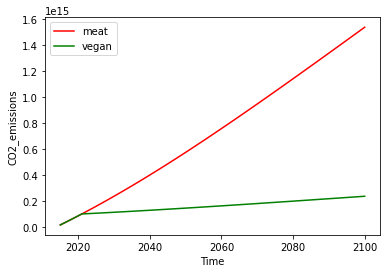

In [20]:

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(popdf.year, popdf.cumul_meat_emissions, 'r', label="meat")
ax.plot(popdf.year, popdf.cumul_vegan_emissions, 'g',label="vegan")

ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("CO2_emissions")

In [21]:

fig = go.Figure()


fig.add_trace(go.Scatter(y=popdf.meat_projections, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=popdf.vegan_projections, x=popdf.year,
                    mode='lines',
                    name='vegan'))


fig.update_layout(
    title = "Emissions (2015 to 2100) due to a global unchanged diet and a global vegan diet from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2 emissions (?)")

fig.show()

In [22]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=popdf.cumul_vegan_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan'))

fig.add_trace(go.Scatter(y=popdf.cumul_meat_emissions, x=popdf.year,
                    mode='lines',
                    name='unchanged'))

fig.update_layout(
    title = "Cumulated emissions (2015 to 2100) due to a global unchanged diet and a global vegan diet from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2 emissions (?)")

fig.show()

In [23]:
fig = go.Figure()


fig.add_trace(go.Scatter(y=popdf.meat_projections, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=projections2, x=popdf.year,
                    mode='lines',
                    name='vegan china'))


fig.add_trace(go.Scatter(y=projections3, x=popdf.year,
                    mode='lines',
                    name='vegan US, AUS and CAN'))

fig.update_layout(
    title = "Emissions (2015 to 2100) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2 emissions (?)")

fig.show()

In [25]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=popdf.cumul_meat_emissions, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=popdf.cumul_2_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan china'))


fig.add_trace(go.Scatter(y=popdf.cumul_3_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan US, AUS and CAN'))

fig.update_layout(
    title = "Cumulated emissions (2015 to 2100) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2 emissions (?)")

fig.show()

In [26]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=popdf.cumul_vegan_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan'))

fig.add_trace(go.Scatter(y=popdf.cumul_meat_emissions, x=popdf.year,
                    mode='lines',
                    name='unchanged'))


fig.add_trace(go.Scatter(y=popdf.cumul_2_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan china'))


fig.add_trace(go.Scatter(y=popdf.cumul_3_emissions, x=popdf.year,
                    mode='lines',
                    name='vegan US, AUS and CAN'))

fig.update_layout(
    title = "Cumulated emissions (2015 to 2100) for different scenarios of diets from 2022 onwards",
    xaxis_title = "Years",
    yaxis_title = "CO2 emissions (?)")

fig.show()